In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
#Creamos un generador de números aleatorios con la función "random"
random_gen = np.random.default_rng()

Sea $F_X$ la función de distribución de una variable aleatoria $X$. 

Sea $U$ una variable aleatorio con distribución uniforme: $U(0,1)$. Se cumple:

$$
P(U≤u)= \int_0^u f_U(u')du' = \int_0^u du' = u,
\quad u\in[0,1]
$$



Como $F_X(x) \in [0,1]$, entonces, por lo anterior: $F_X(x) = P\big( U≤F_X(x) \big)$

Vamos a comparar ahora ambas variables aleatorias mediante:

$$
P\big( U≤F_X(x) \big) = P\big( F_X^{-1}(U)≤x \big) = F_X(x)
$$

Así, $F_X^{-1}(U)$ es una variable aleatoria con función de distribución $F_X$. Entonces, los puntos generados por $F^{-1}_X(U)$ se distribuyen de acuerdo a la variable aleatoria cuya función de distribución es $F_X$

Así, para generar dichos puntos, generaremos una muestra uniforme y la transformaremos por $F^{-1}_X$.

Tomamos una muestra de la distribución uniforme U(0,1), la dibujamos en un gráfico y bosquejamos la función de densidad mediante un histograma

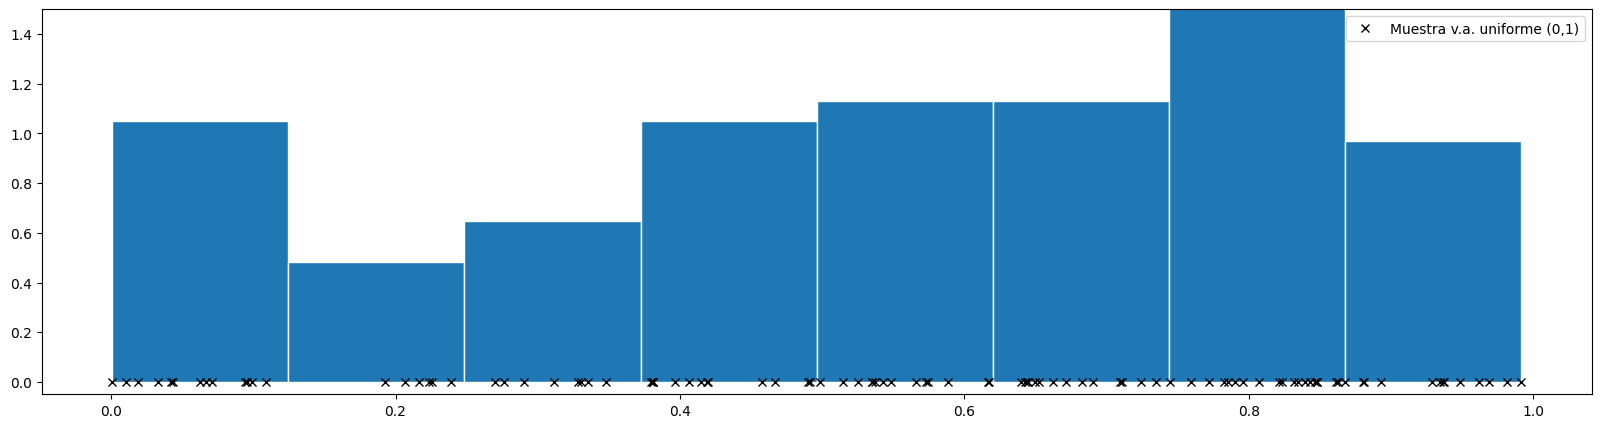

In [ ]:
#Tomamos una muestra de una variable aleatoria con distribución uniforme u(0,1)
muestra_uniforme = random_gen.uniform(low=0,high=1,size = 100)

#Definimos el tamaño de la figura
plt.figure(figsize=(20,5))

#Límites del eje y
plt.ylim((-0.05,1.5))

#Dibujamos la muestra
plt.plot(muestra_uniforme, np.zeros_like(muestra_uniforme) ,'x',color='black',label="Muestra v.a. uniforme (0,1)")

#Bosquejamos la función de densidad mediante un histograma
plt.hist(muestra_uniforme,density = True, edgecolor = 'white',bins = 'auto')
plt.legend()
plt.show()

Ahora representamos la misma muestra uniforme sobre el eje y

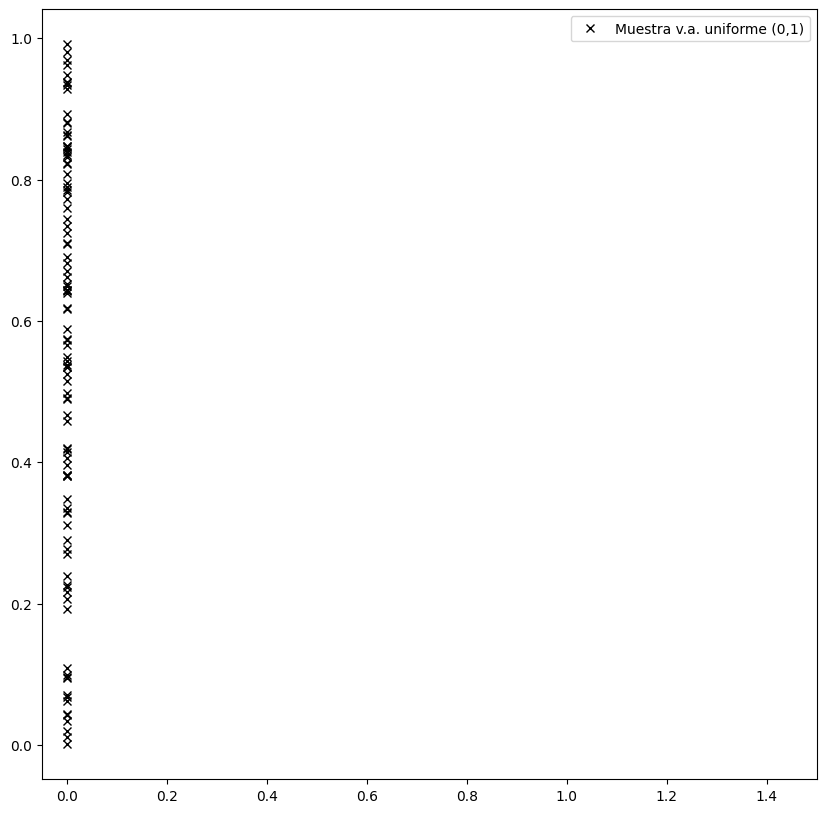

In [ ]:
#Definimos el tamaño de la figura
plt.figure(figsize=(10,10))

#Límites del eje y
plt.xlim((-0.05,1.5))

#Dibujamos la muestra
plt.plot(np.zeros_like(muestra_uniforme),muestra_uniforme ,'x',color='black',label="Muestra v.a. uniforme (0,1)")

plt.legend()
plt.show()

## Lo cambiamos al eje y

$X \sim exp(\lambda)$

$f_X(x) = \lambda e^{-\lambda x}$

$F_X(x) = 1- e^{-\lambda x}$

$F_X^{-1}(u) = \frac{-\log(1-u)}{\lambda} $

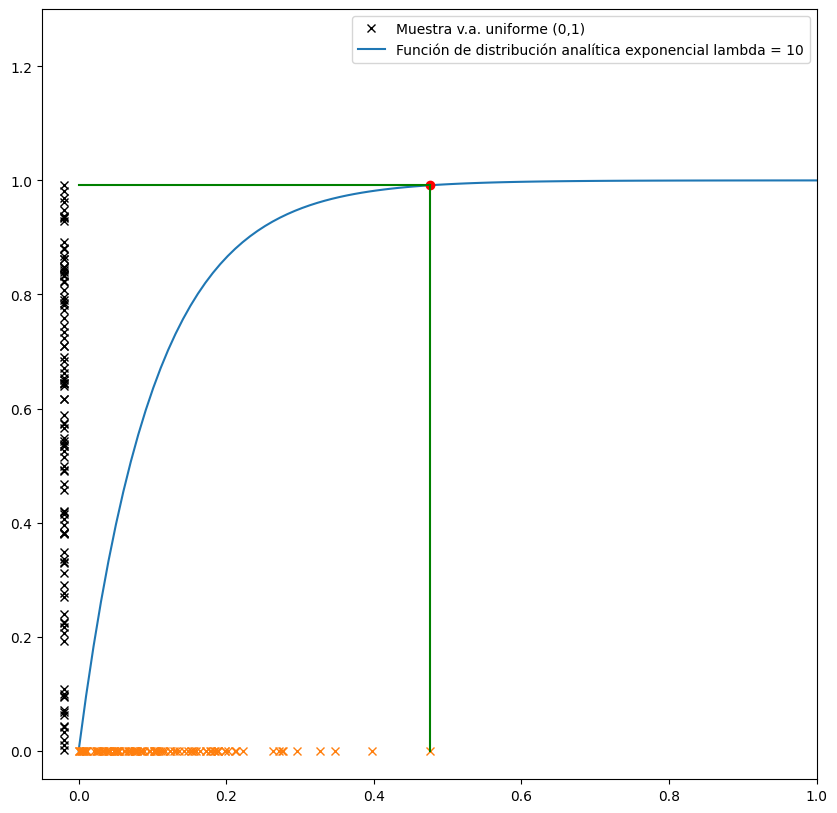

In [ ]:
#Definimos el tamaño de la figura
plt.figure(figsize=(10,10))

#Límites del eje y
plt.ylim((-0.05,1.3))
plt.xlim((-0.05,1))

#Dibujamos la muestra en el eje y
plt.plot(np.zeros_like(muestra_uniforme)-0.02,muestra_uniforme ,'x',color='black',label="Muestra v.a. uniforme (0,1)")


#DIBUJAMOS LA DISTRIBUCIÓN DE LA EXPONENCIAL
x = np.linspace(0,1,100)
lambda_ = 10 #parámetro de la exponencial
F_x =1-np.exp(-lambda_*x)
plt.plot(x, F_x,label = 'Función de distribución analítica exponencial lambda = 10')

#DIBUJAMOS LA MUESTRA TRANSFORMADA
muestra_transformada = -np.log(1-muestra_uniforme)/lambda_
plt.plot(muestra_transformada,np.zeros_like(muestra_transformada),'x')

#DIBUJAMOS UN PUNTO TRANSFORMADO (elegimos el máximo de la uniforme)
max_unif = np.max(muestra_uniforme)
max_trans = np.max(muestra_transformada)

x1,y1 = [0,max_trans],[max_unif,max_unif] #puntos x e y de la primera línea
x2,y2 = [max_trans,max_trans],[max_unif,0]

plt.plot(max_trans,max_unif,'ro')

#x1,y1 = [0,muestra_transformada[0]],[muestra_uniforme[0],0]
plt.plot(x1,y1,x2,y2,color='green')

plt.legend()
plt.show()

Hacemos el histograma

Dibujamos el histograma y vemos que tenemos una exponencial

In [ ]:
#Dibujamos la función de densidad de la exponencial utilizando el dominio anterior
f_x = lambda_*np.exp(-lambda_*x)

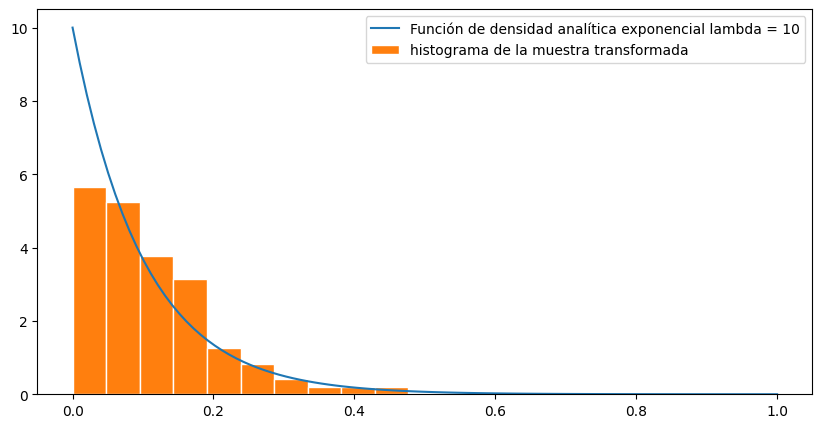

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x,f_x,label = 'Función de densidad analítica exponencial lambda = 10')
plt.hist(muestra_transformada,density = True, edgecolor = 'white',bins = 'auto',label="histograma de la muestra transformada")
plt.legend()
plt.show()

Repetimos el proceso para una muestra de 10.000

In [ ]:
#Generamos la muestra uniforme
muestra_uniforme = random_gen.uniform(low=0,high=1,size = 100000)

#La transformamos a la muestra de una exponencial de parámetro 10
muestra_transformada = -np.log(1-muestra_uniforme)/lambda_

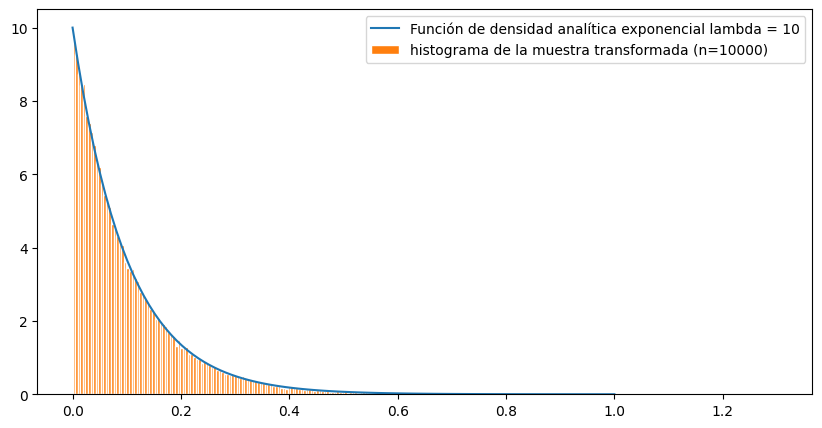

In [ ]:
#Lo volvemos a representar gráficamente
plt.figure(figsize=(10,5))
plt.plot(x,f_x,label = 'Función de densidad analítica exponencial lambda = 10')
plt.hist(muestra_transformada,density = True, edgecolor = 'white',bins = 'auto',label="histograma de la muestra transformada (n=100000)")
plt.legend()
plt.show()